In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime #deal with date

In [72]:
data = pd.read_csv("netflix_titles.csv")

In [73]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [74]:
data['date_added']=pd.to_datetime(data['date_added'],errors ='coerce')

In [75]:
data= data.sort_values(['show_id','date_added'])

In [76]:
data['Day']=data['date_added'].dt.day_name()

In [77]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month_name()

# Titles added per year

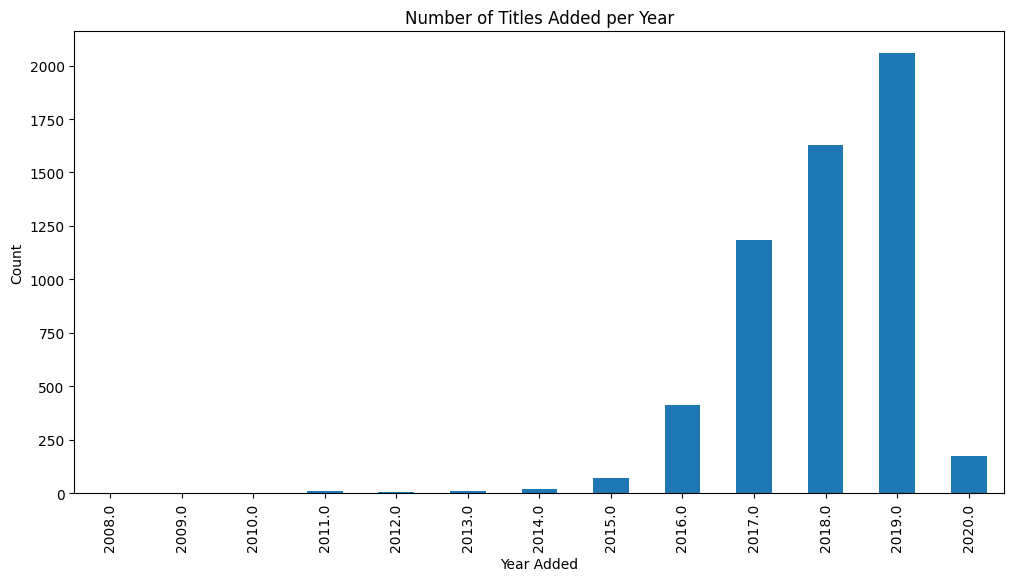

In [78]:
titles_per_year = data['year_added'].value_counts().sort_index()

plt.figure(figsize=(12,6))
titles_per_year.plot(kind='bar')
plt.title("Number of Titles Added per Year")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.show()

# Movies vs TV Shows added over time

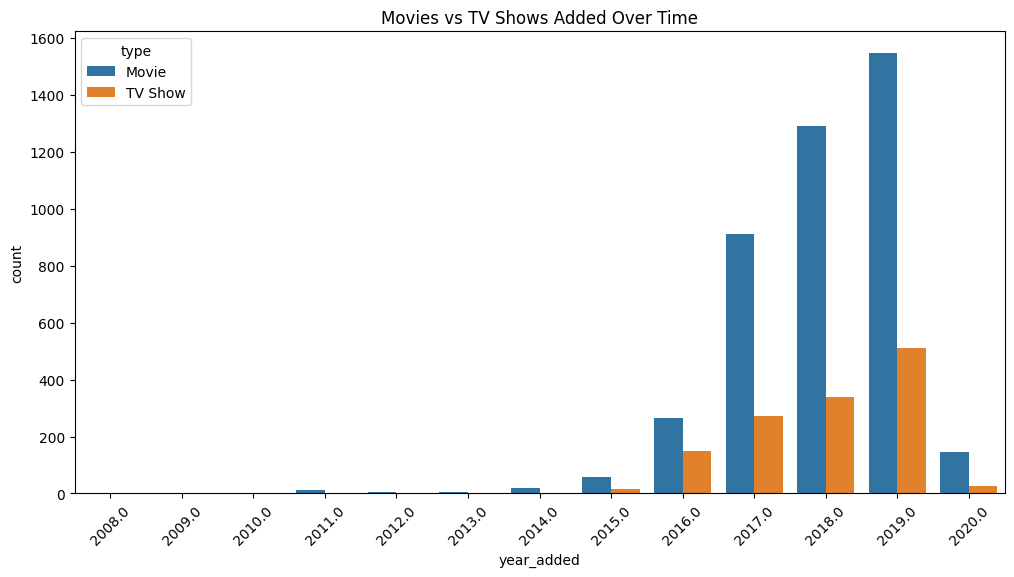

In [79]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='year_added', hue='type')
plt.title("Movies vs TV Shows Added Over Time")
plt.xticks(rotation=45)
plt.show()


# Monthly pattern of releases (heatmap)

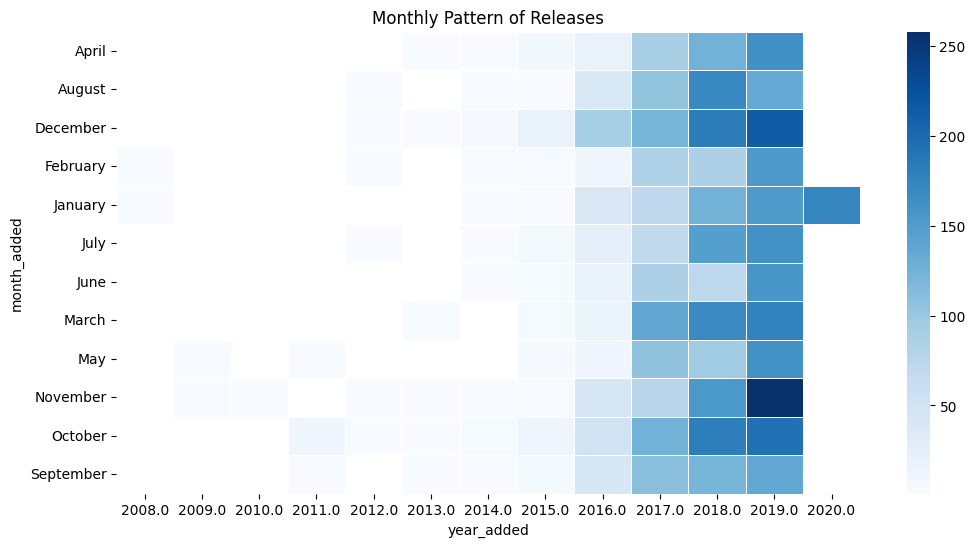

In [80]:
month_year = data.groupby(['year_added', 'month_added']).size().reset_index(name='count')

pivot = month_year.pivot(index="month_added", columns="year_added", values="count")

plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="Blues", linewidths=.5)
plt.title("Monthly Pattern of Releases")
plt.show()

# Releese year vs Added year

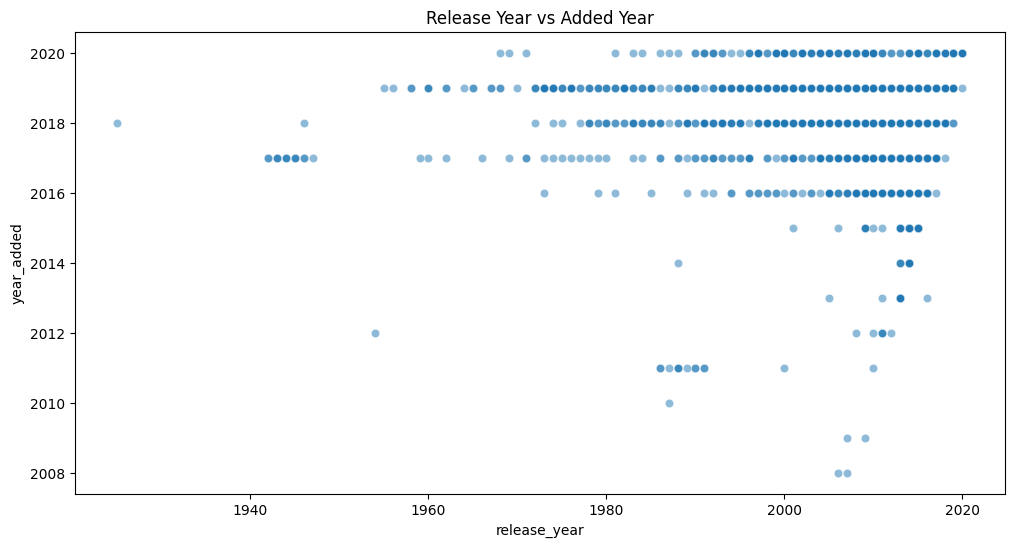

In [81]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=data, x='release_year', y='year_added',alpha=0.5)
plt.title("Release Year vs Added Year")
plt.show()

# Top 10 release years

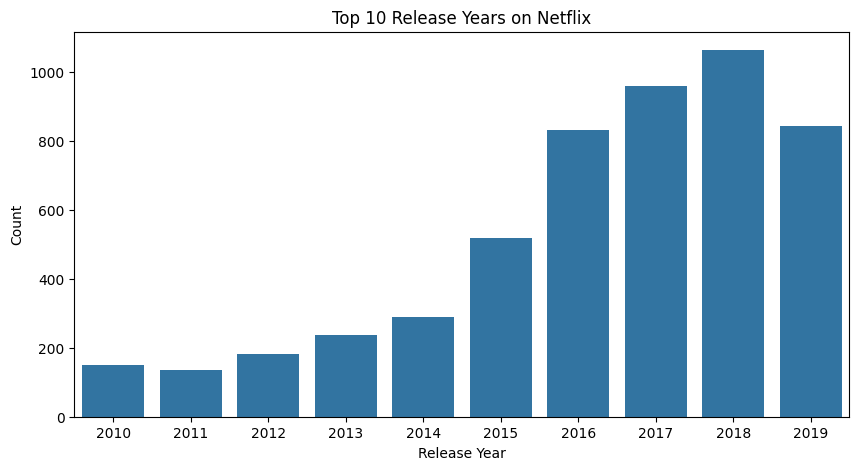

In [82]:
top_release_years = data['release_year'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_release_years.index, y=top_release_years.values)
plt.title("Top 10 Release Years on Netflix")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


# Cumulative growth of Netflix library

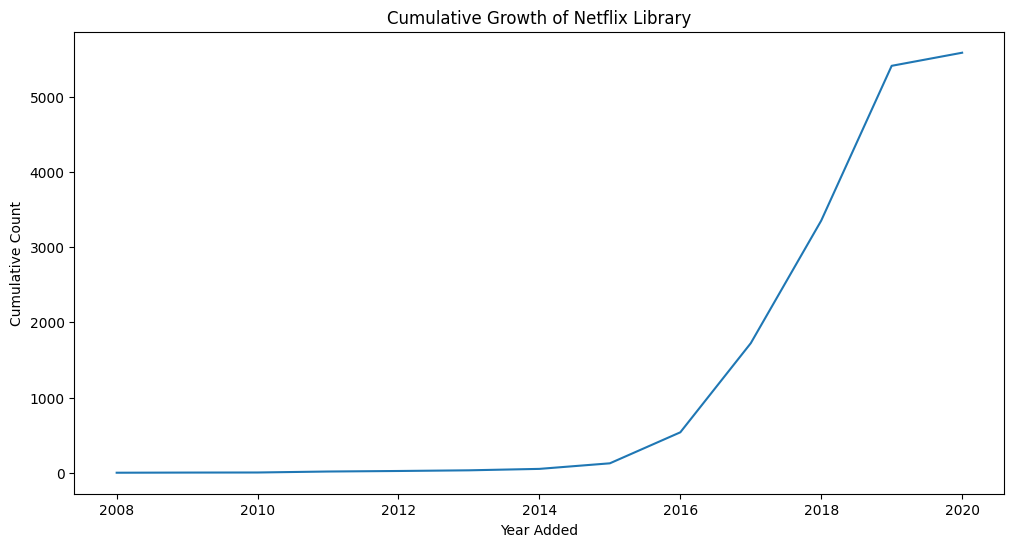

In [83]:
cumulative_titles = data.groupby('year_added').size().cumsum()

plt.figure(figsize=(12,6))
cumulative_titles.plot()
plt.title("Cumulative Growth of Netflix Library")
plt.xlabel("Year Added")
plt.ylabel("Cumulative Count")
plt.show()


# Average content age on Netflix

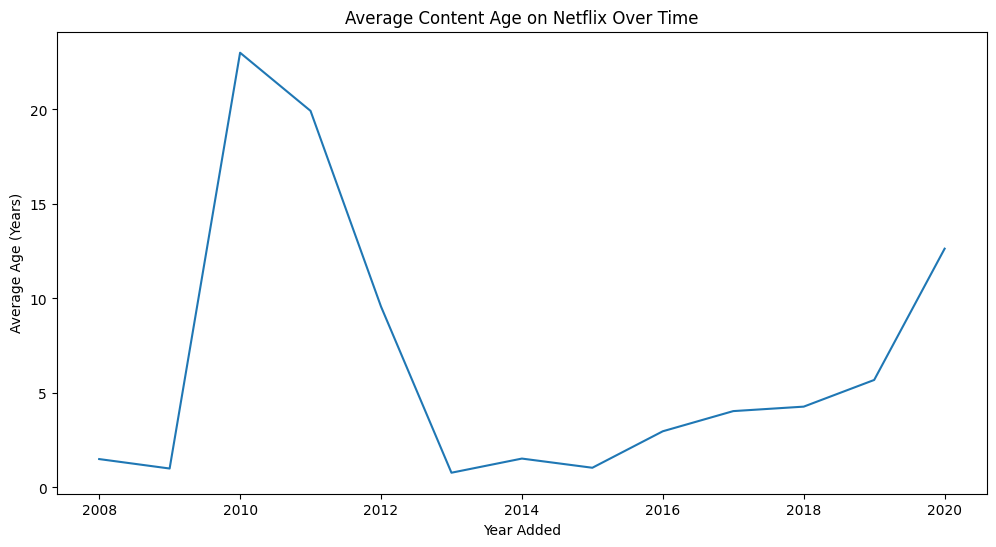

In [84]:
data['content_age'] = data['year_added'] -data['release_year']
avg_age = data.groupby('year_added')['content_age'].mean()

plt.figure(figsize=(12,6))
avg_age.plot()
plt.title("Average Content Age on Netflix Over Time")
plt.xlabel("Year Added")
plt.ylabel("Average Age (Years)")
plt.show()


# Which month see most new titles ?

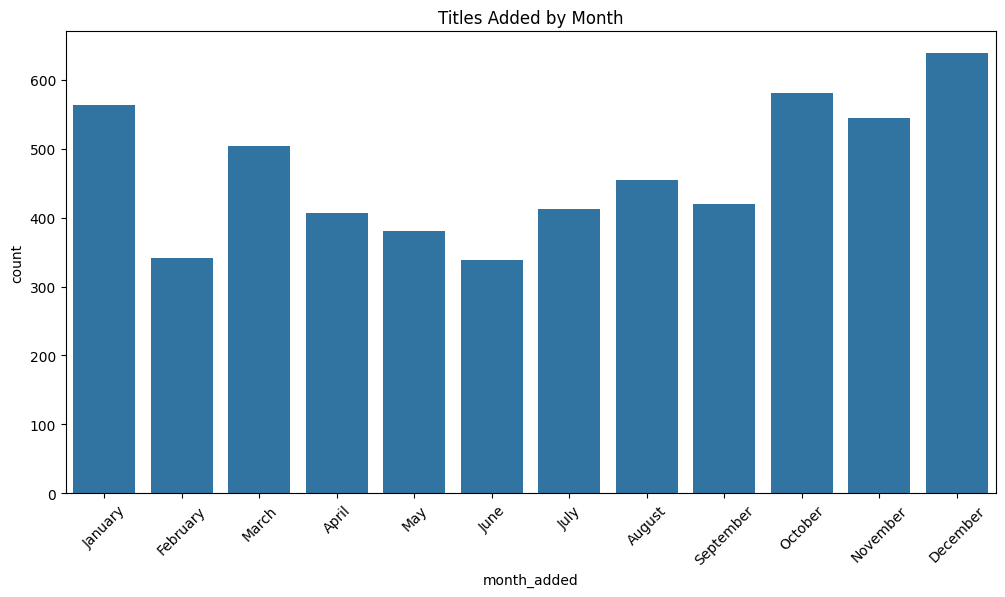

In [85]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='month_added', order=pd.date_range("2000-01-01","2000-12-01",freq="MS").month_name())
plt.title("Titles Added by Month")
plt.xticks(rotation=45)
plt.show()


# Distribution of ratings over time

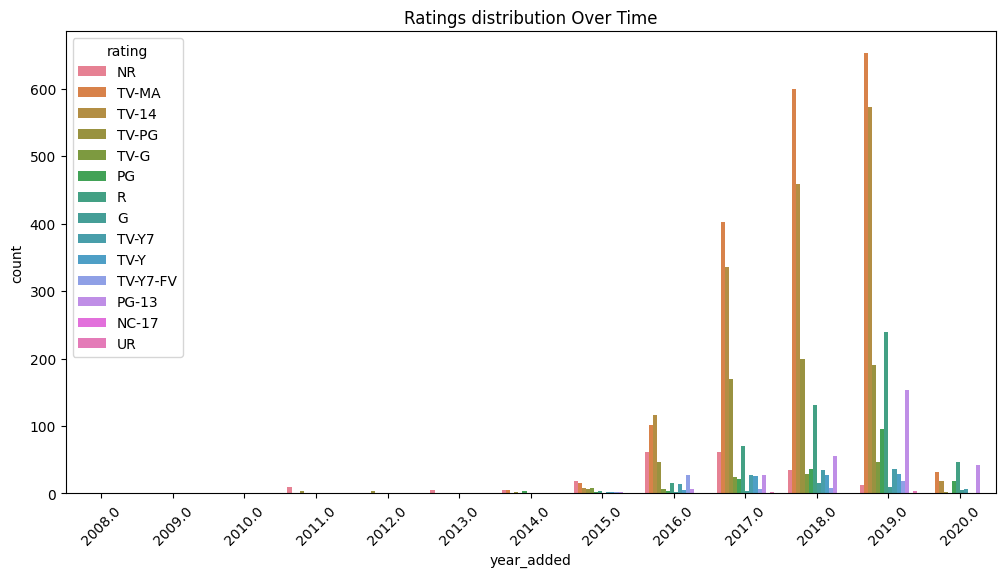

In [86]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='year_added', hue='rating')
plt.title("Ratings distribution Over Time")
plt.xticks(rotation=45)
plt.show()


# Country additions trend (Top 5 countres)

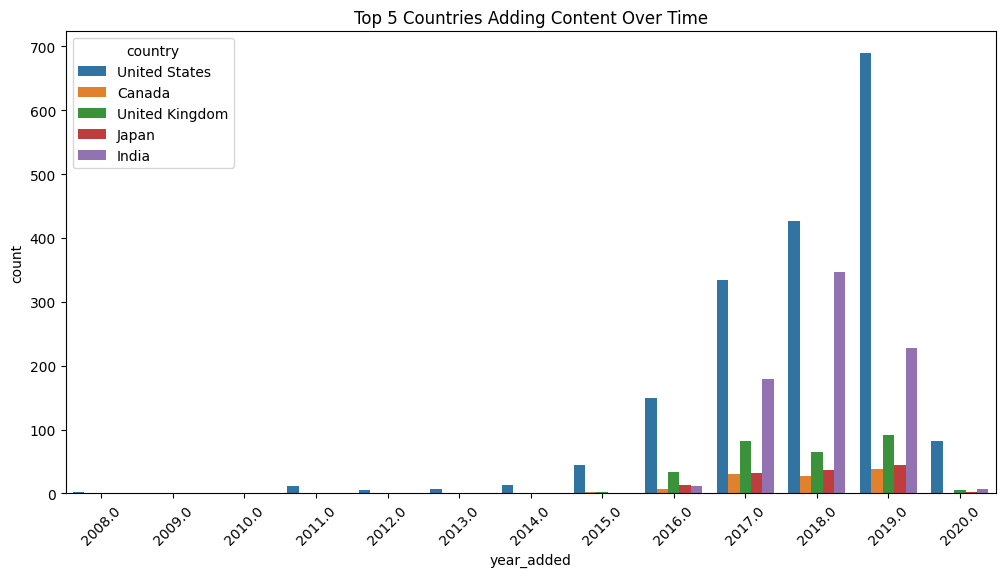

In [87]:
top_countries = data['country'].value_counts().nlargest(5).index
country_trend = data[data['country'].isin(top_countries)]

plt.figure(figsize=(12,6))
sns.countplot(data=country_trend, x='year_added', hue='country')
plt.title("Top 5 Countries Adding Content Over Time")
plt.xticks(rotation=45)
plt.show()


# 20 Business questions between columns and each other


What percentage of Netflix is Movies vs TV Shows?

Which countries produce the most Netflix content?

Which actors appear most often in Netflix titles?

Which genres listed_in) are most popular?

How has the mix of content genres changed over time?

Which release years dominate Netflix? (e.g., old classics vs new titles)

Which ratings (PG, R, TV-MA, ..) dominate Netflix content?

Which countries specialize more in TV Shows vs Movies?

Are TV shows increasing faster than movies on Netflix?

Which countries add the most recent releases (2020s vs 2000s)?

User Experience / Duration

What’s the average duration of movies?

Which TV Shows have the longest durations (seasons/episodes)?

Is there a trend of shorter vs longer movies over time?

Which genres tend to have longer average durations?

Market Trends

Which countries dominate specific genres (e.g., India → Bollywood, US → Action)?

Which genres are most popular in the last 5 years?

Which actors/actresses appear most in specific genres?

Which genres have the highest proportion of new releases?

Which countries produce the most family-friendly vs adult-oriented content?

How diversified is Netflix across countries (is it US-heavy or balanced)?

# Gold price Data

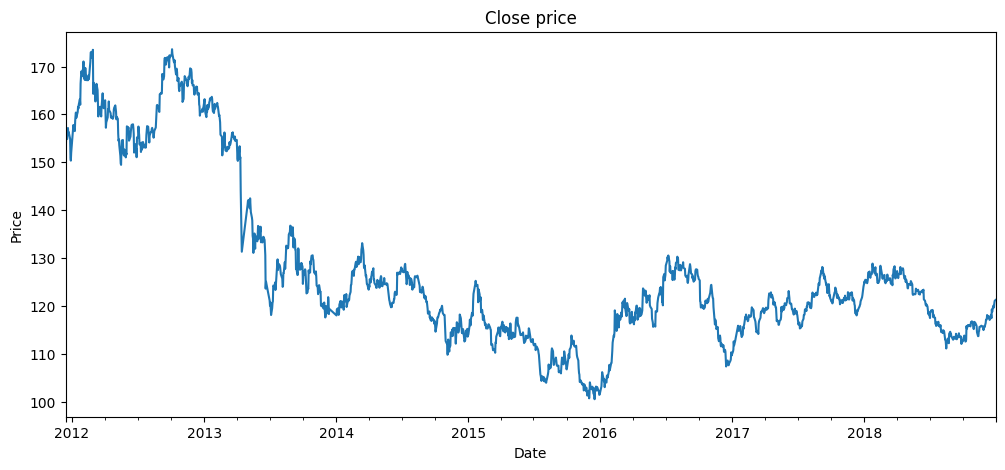

In [88]:
# Basic imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline


df = pd.read_csv("FINAL_USO.csv", parse_dates=["Date"])





df = df.sort_values("Date").set_index("Date")


TARGET = "Close"
series = df[[TARGET]].copy().rename(columns={TARGET: "Price"}).dropna()

series = series.asfreq(pd.infer_freq(series.index) or "D")
series["Price"] = series["Price"].interpolate()


series["Price"].plot(figsize=(12,5), title=f"{TARGET} price")
plt.ylabel("Price")
plt.show()


# Stationary check

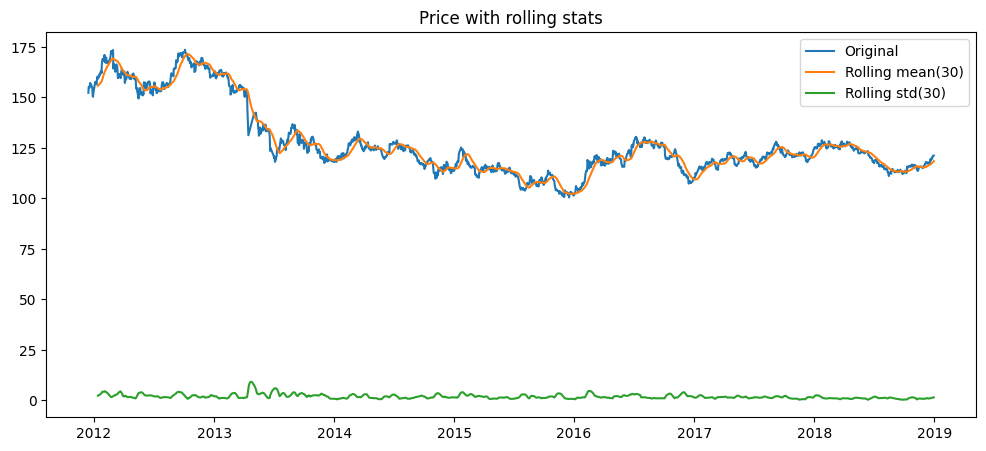


ADF test on Original Price:
ADF stat = -1.86110, p-value = 0.35058
  crit 1%: -3.4329
  crit 5%: -2.8627
  crit 10%: -2.5674


(np.float64(-1.8610981265558524),
 np.float64(0.35057712680759606),
 2,
 2571,
 {'1%': np.float64(-3.432896029169223),
  '5%': np.float64(-2.862664835817767),
  '10%': np.float64(-2.5673687913539416)},
 np.float64(6721.158071644997))

In [89]:
from statsmodels.tsa.stattools import adfuller

def adf_test(s, title="series"):
    s = s.dropna()
    print(f"\nADF test on {title}:")
    res = adfuller(s, autolag="AIC")
    print(f"ADF stat = {res[0]:.5f}, p-value = {res[1]:.5f}")
    for k,v in res[4].items():
        print(f"  crit {k}: {v:.4f}")
    return res


rolling_mean = series["Price"].rolling(window=30).mean()
rolling_std  = series["Price"].rolling(window=30).std()

plt.figure(figsize=(12,5))
plt.plot(series["Price"], label="Original")
plt.plot(rolling_mean, label="Rolling mean(30)")
plt.plot(rolling_std, label="Rolling std(30)")
plt.legend()
plt.title("Price with rolling stats")
plt.show()

adf_test(series["Price"], "Original Price")


# LIM

In [90]:

series["log_price"] = np.log1p(series["Price"])


series["log_diff1"] = series["log_price"].diff()


import statsmodels.api as sm
non_na = series["log_price"].dropna()
X = sm.add_constant(np.arange(len(non_na)))
ols = sm.OLS(non_na.values, X).fit()
trend = ols.predict(X)
series.loc[non_na.index, "log_detrended"] = non_na.values - trend


adf_test(series["log_diff1"].dropna(), "log first difference")



ADF test on log first difference:
ADF stat = -33.64898, p-value = 0.00000
  crit 1%: -3.4329
  crit 5%: -2.8627
  crit 10%: -2.5674


(np.float64(-33.648977150457036),
 0.0,
 1,
 2571,
 {'1%': np.float64(-3.432896029169223),
  '5%': np.float64(-2.862664835817767),
  '10%': np.float64(-2.5673687913539416)},
 np.float64(-18096.820997102986))

# Root andSquared transforms

In [91]:

series["sqrt_price"] = np.sqrt(series["Price"].clip(lower=0))

series["sq_price"] = series["Price"] ** 2

adf_test(series["sqrt_price"].dropna(), "sqrt")
adf_test(series["sq_price"].dropna(), "square")



ADF test on sqrt:
ADF stat = -1.87976, p-value = 0.34164
  crit 1%: -3.4329
  crit 5%: -2.8627
  crit 10%: -2.5674

ADF test on square:
ADF stat = -1.83299, p-value = 0.36421
  crit 1%: -3.4329
  crit 5%: -2.8627
  crit 10%: -2.5674


(np.float64(-1.8329919055140902),
 np.float64(0.3642094634550486),
 2,
 2571,
 {'1%': np.float64(-3.432896029169223),
  '5%': np.float64(-2.862664835817767),
  '10%': np.float64(-2.5673687913539416)},
 np.float64(35238.42493025861))

# MA model

Train range: 2011-12-15 00:00:00 2018-10-02 00:00:00
Test range: 2018-10-03 00:00:00 2018-12-31 00:00:00
                               SARIMAX Results                                
Dep. Variable:              log_diff1   No. Observations:                 2483
Model:                 ARIMA(0, 0, 2)   Log Likelihood                8804.632
Date:                Fri, 26 Sep 2025   AIC                         -17601.265
Time:                        08:01:21   BIC                         -17577.996
Sample:                    12-16-2011   HQIC                        -17592.814
                         - 10-02-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.794      0.427      -0.000       0.000
ma.L1          0.0434     

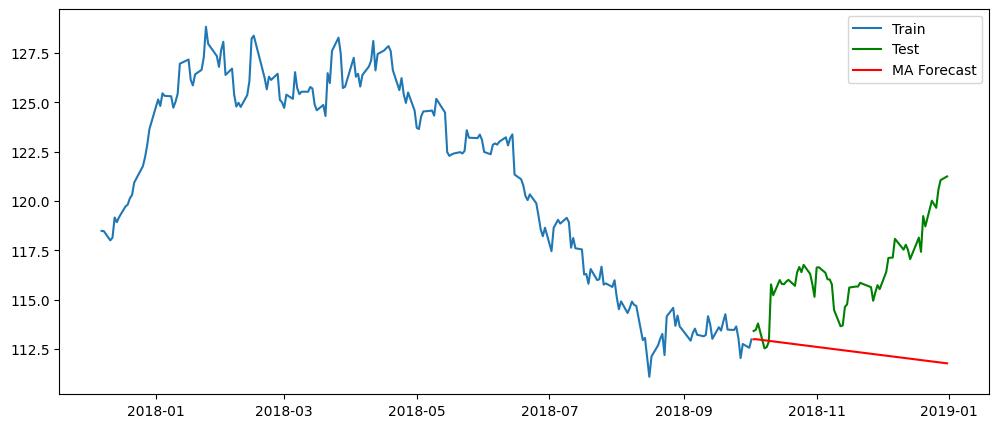

In [92]:

TEST_DAYS = 90
train = series.iloc[:-TEST_DAYS].copy()
test  = series.iloc[-TEST_DAYS:].copy()
print("Train range:", train.index.min(), train.index.max())
print("Test range:", test.index.min(), test.index.max())
from statsmodels.tsa.arima.model import ARIMA

ser = train["log_diff1"].dropna()

ma_q = 2
ma_model = ARIMA(ser, order=(0,0,ma_q)).fit()
print(ma_model.summary())

steps = len(test)
ma_forecast_diff = ma_model.get_forecast(steps=steps).predicted_mean

last_log = train["log_price"].dropna().iloc[-1]
log_forecast_levels = last_log + ma_forecast_diff.cumsum()
ma_forecast_original = np.expm1(log_forecast_levels)
ma_forecast_original.index = test.index

plt.figure(figsize=(12,5))
plt.plot(train["Price"][-300:], label="Train")
plt.plot(test["Price"], label="Test", color="green")
plt.plot(ma_forecast_original, label="MA Forecast", color="red")
plt.legend()
plt.show()


# MA model (MA(q)) implemented as ARIMA(0,0,q)

                               SARIMAX Results                                
Dep. Variable:              log_diff1   No. Observations:                 2483
Model:                 ARIMA(0, 0, 2)   Log Likelihood                8804.632
Date:                Fri, 26 Sep 2025   AIC                         -17601.265
Time:                        08:01:22   BIC                         -17577.996
Sample:                    12-16-2011   HQIC                        -17592.814
                         - 10-02-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.794      0.427      -0.000       0.000
ma.L1          0.0434      0.015      2.833      0.005       0.013       0.074
ma.L2          0.0437      0.016      2.746      0.0

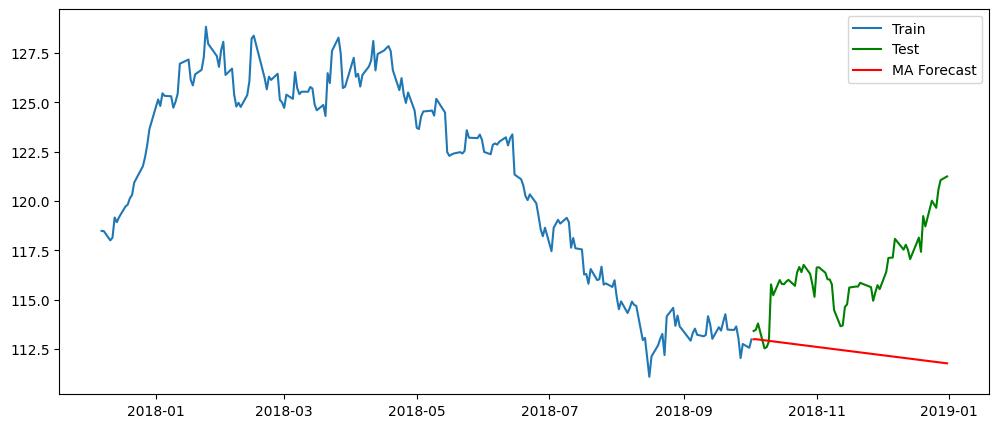

In [93]:
from statsmodels.tsa.arima.model import ARIMA


ser = train["log_diff1"].dropna()


ma_q = 2
ma_model = ARIMA(ser, order=(0,0,ma_q)).fit()
print(ma_model.summary())


steps = len(test)
ma_forecast_diff = ma_model.get_forecast(steps=steps).predicted_mean

last_log = train["log_price"].dropna().iloc[-1]
log_forecast_levels = last_log + ma_forecast_diff.cumsum()
ma_forecast_original = np.expm1(log_forecast_levels)
ma_forecast_original.index = test.index

plt.figure(figsize=(12,5))
plt.plot(train["Price"][-300:], label="Train")
plt.plot(test["Price"], label="Test", color="green")
plt.plot(ma_forecast_original, label="MA Forecast", color="red")
plt.legend()
plt.show()


# AR

                            AutoReg Model Results                             
Dep. Variable:              log_diff1   No. Observations:                 2483
Model:                    AutoReg(10)   Log Likelihood                8775.657
Method:               Conditional MLE   S.D. of innovations              0.007
Date:                Fri, 26 Sep 2025   AIC                         -17527.315
Time:                        08:01:22   BIC                         -17457.556
Sample:                    12-26-2011   HQIC                        -17501.975
                         - 10-02-2018                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0001      0.000     -0.796      0.426      -0.000       0.000
log_diff1.L1      0.0452      0.020      2.246      0.025       0.006       0.085
log_diff1.L2      0.0422      0.020     

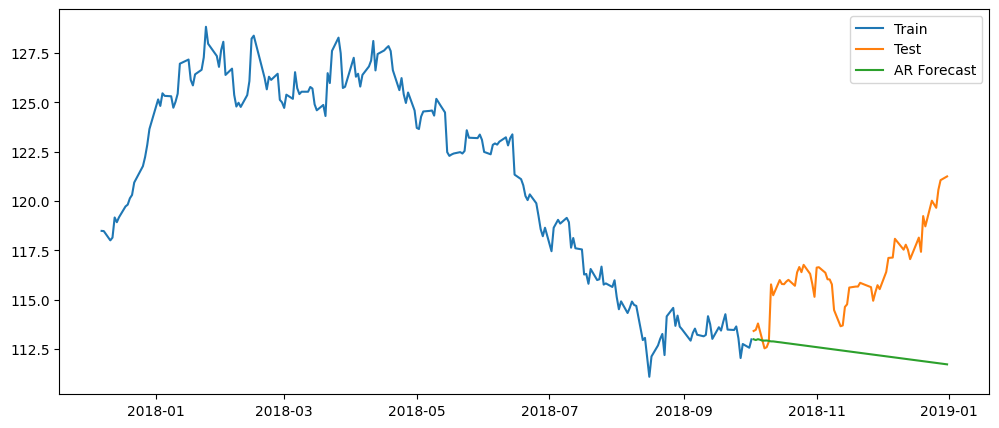

In [94]:
from statsmodels.tsa.ar_model import AutoReg

ser = train["log_diff1"].dropna()
ar_lags = 10
ar_model = AutoReg(ser, lags=ar_lags, old_names=False).fit()
print(ar_model.summary())

ar_forecast_diff = ar_model.predict(start=len(ser), end=len(ser)+len(test)-1)

last_log = train["log_price"].dropna().iloc[-1]
log_levels_ar = last_log + pd.Series(ar_forecast_diff).cumsum()
ar_forecast = np.expm1(log_levels_ar.values)
ar_forecast = pd.Series(ar_forecast, index=test.index)

plt.figure(figsize=(12,5))
plt.plot(train["Price"][-300:], label="Train")
plt.plot(test["Price"], label="Test")
plt.plot(ar_forecast, label="AR Forecast")
plt.legend()
plt.show()


# ARMA (p,q)

/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:              log_price   No. Observations:                 2484
Model:                 ARIMA(2, 0, 2)   Log Likelihood                8805.803
Date:                Fri, 26 Sep 2025   AIC                         -17599.606
Time:                        08:01:26   BIC                         -17564.700
Sample:                    12-15-2011   HQIC                        -17586.929
                         - 10-02-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.8496      0.056     86.792      0.000       4.740       4.959
ar.L1          0.8765      0.448      1.956      0.050      -0.002       1.755
ar.L2          0.1211      0.447      0.271      0.7

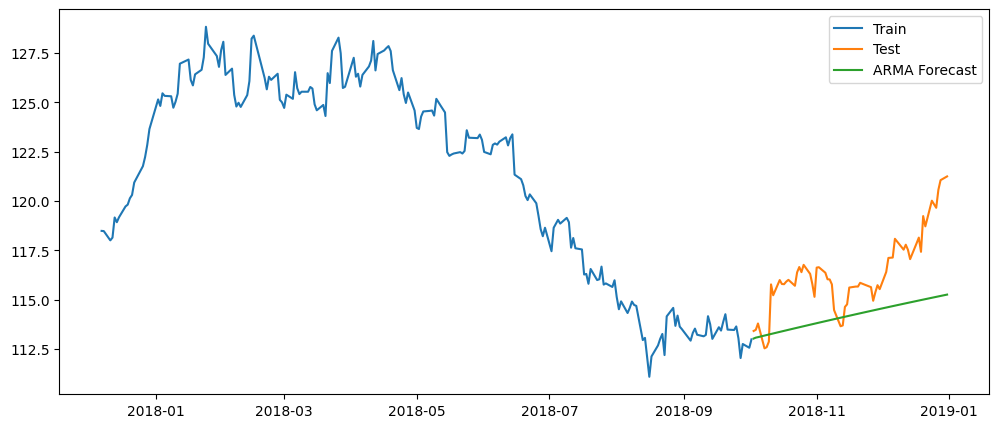

In [95]:

ser_log = train["log_price"].dropna()
arma_model = ARIMA(ser_log, order=(2,0,2)).fit()
print(arma_model.summary())

arma_forecast_log = arma_model.get_forecast(steps=len(test)).predicted_mean
arma_forecast = np.expm1(arma_forecast_log)
arma_forecast.index = test.index

plt.figure(figsize=(12,5))
plt.plot(train["Price"][-300:], label="Train")
plt.plot(test["Price"], label="Test")
plt.plot(arma_forecast, label="ARMA Forecast")
plt.legend()
plt.show()


# ARIMA (p,d,q)

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2484
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3318.116
Date:                Fri, 26 Sep 2025   AIC                           6646.232
Time:                        08:01:28   BIC                           6675.318
Sample:                    12-15-2011   HQIC                          6656.795
                         - 10-02-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2503      0.339     -0.738      0.461      -0.915       0.415
ar.L2         -0.1252      0.330     -0.379      0.704      -0.772       0.522
ma.L1          0.2936      0.341      0.861      0.3

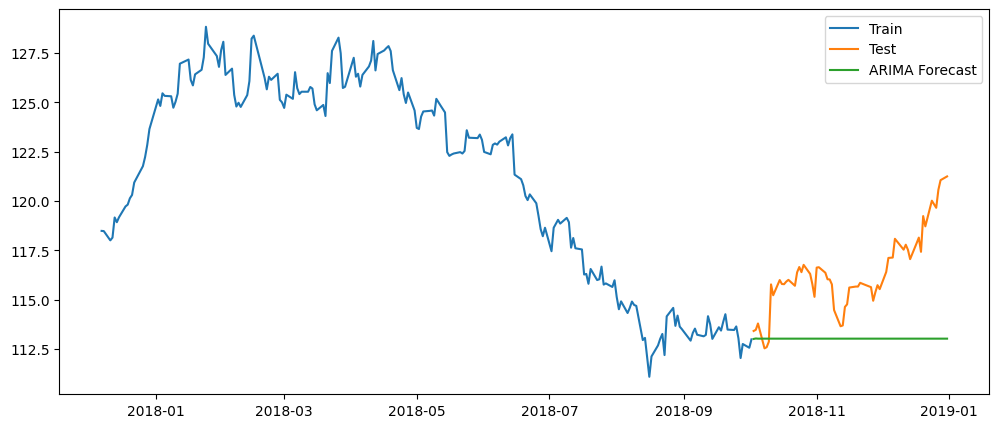

In [96]:

arima_model = ARIMA(train["Price"], order=(2,1,2)).fit()
print(arima_model.summary())

arima_forecast = arima_model.get_forecast(steps=len(test)).predicted_mean
arima_forecast.index = test.index

plt.figure(figsize=(12,5))
plt.plot(train["Price"][-300:], label="Train")
plt.plot(test["Price"], label="Test")
plt.plot(arima_forecast, label="ARIMA Forecast")
plt.legend()
plt.show()


# Exponential Smoothing (Holt-Winters)

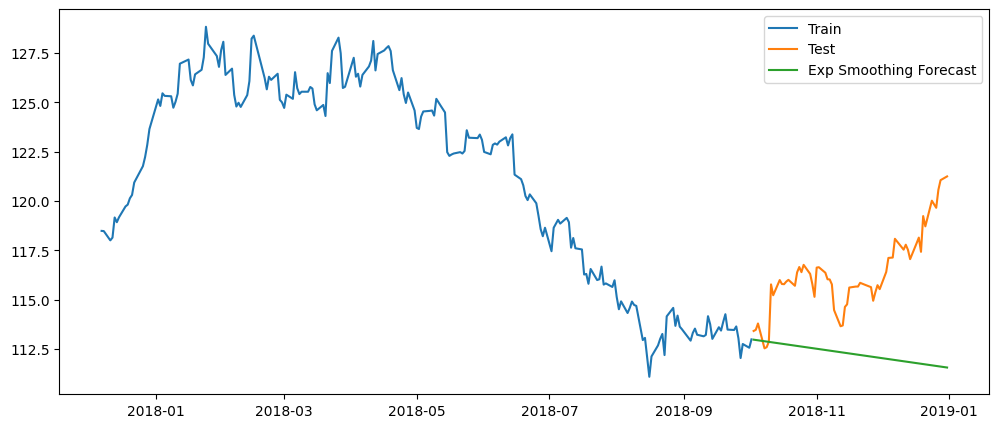

In [97]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


hw = ExponentialSmoothing(train["Price"], trend="add", seasonal=None).fit()
hw_forecast = hw.forecast(len(test))
hw_forecast.index = test.index

plt.figure(figsize=(12,5))
plt.plot(train["Price"][-300:], label="Train")
plt.plot(test["Price"], label="Test")
plt.plot(hw_forecast, label="Exp Smoothing Forecast")
plt.legend()
plt.show()


# Linear trend

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.469
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     2194.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        08:01:29   Log-Likelihood:                -9877.6
No. Observations:                2484   AIC:                         1.976e+04
Df Residuals:                    2482   BIC:                         1.977e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        148.8137      0.518    287.350      0.0

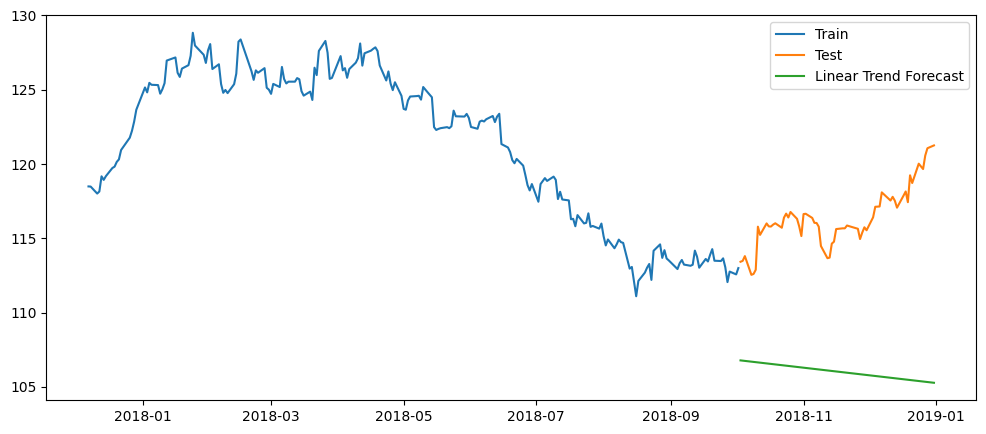

In [98]:
import statsmodels.api as sm

y = train["Price"].values
X = sm.add_constant(np.arange(len(y)))
ols = sm.OLS(y, X).fit()
print(ols.summary())

future_idx = np.arange(len(y), len(y)+len(test))
pred = ols.predict(sm.add_constant(future_idx))
pred = pd.Series(pred, index=test.index)

plt.figure(figsize=(12,5))
plt.plot(train["Price"][-300:], label="Train")
plt.plot(test["Price"], label="Test")
plt.plot(pred, label="Linear Trend Forecast")
plt.legend()
plt.show()


# SARIMA

                                     SARIMAX Results                                     
Dep. Variable:                             Price   No. Observations:                 2484
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood               -3327.886
Date:                           Fri, 26 Sep 2025   AIC                           6665.771
Time:                                   08:01:37   BIC                           6694.843
Sample:                               12-15-2011   HQIC                          6676.331
                                    - 10-02-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5026      0.245      2.055      0.040       0.023       0.982
ma.L1         -0.4534      0.253     -1.795

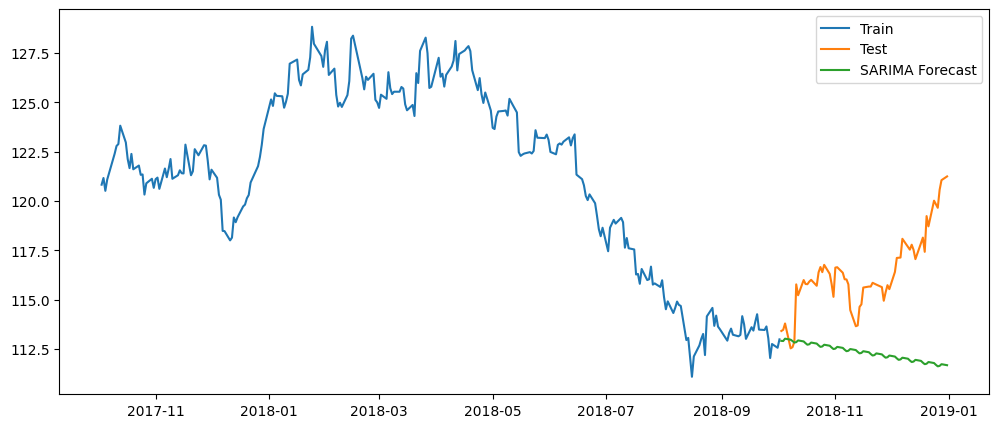

In [99]:
from statsmodels.tsa.statespace.sarimax import SARIMAX


s = 7
sarima = SARIMAX(train["Price"], order=(1,1,1), seasonal_order=(1,1,1,s)).fit(disp=False)
print(sarima.summary())

sarima_forecast = sarima.get_forecast(steps=len(test)).predicted_mean
sarima_forecast.index = test.index

plt.figure(figsize=(12,5))
plt.plot(train["Price"][-365:], label="Train")
plt.plot(test["Price"], label="Test")
plt.plot(sarima_forecast, label="SARIMA Forecast")
plt.legend()
plt.show()


# Prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmper7ehz/c0fg132h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmper7ehz/5f3urv0f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93908', 'data', 'file=/tmp/tmpmper7ehz/c0fg132h.json', 'init=/tmp/tmpmper7ehz/5f3urv0f.json', 'output', 'file=/tmp/tmpmper7ehz/prophet_modelruqnmc5m/prophet_model-20250926080138.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:01:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:01:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


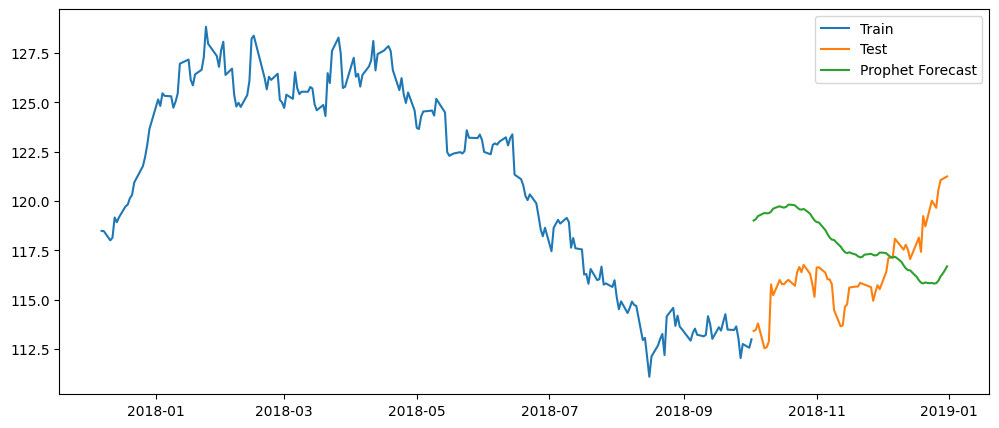

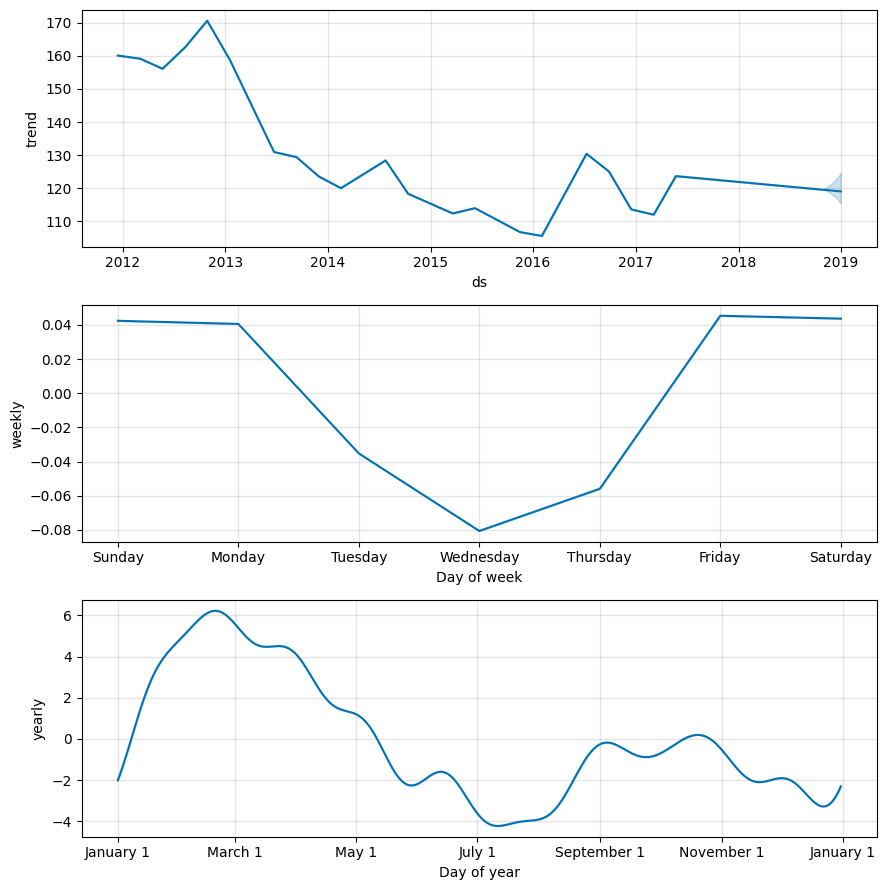

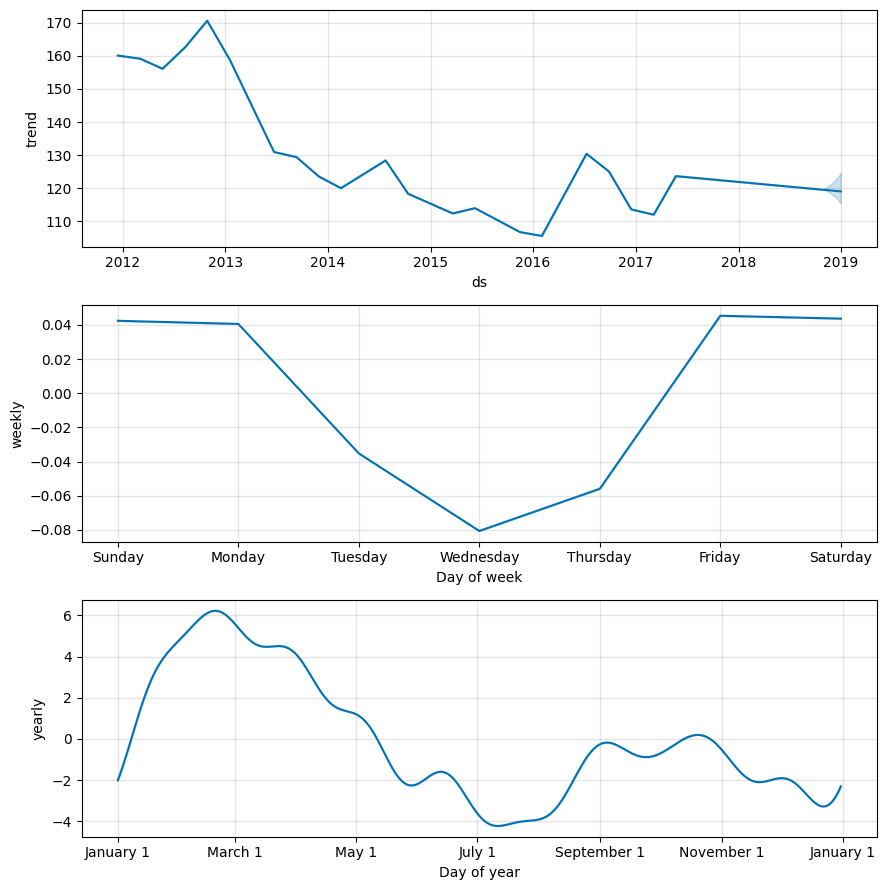

In [100]:

from prophet import Prophet

prophet_df = train["Price"].reset_index().rename(columns={"Date":"ds", "Price":"y"}) if "Date" in train.reset_index().columns else train.reset_index().rename(columns={"index":"ds","Price":"y"})
m = Prophet(daily_seasonality=False, yearly_seasonality=True, weekly_seasonality=True)
m.fit(prophet_df)

future = m.make_future_dataframe(periods=len(test), freq="D")
forecast = m.predict(future)
prophet_pred = forecast.set_index("ds")["yhat"].loc[test.index]

plt.figure(figsize=(12,5))
plt.plot(train["Price"][-300:], label="Train")
plt.plot(test["Price"], label="Test")
plt.plot(prophet_pred, label="Prophet Forecast")
plt.legend()
plt.show()
m.plot_components(forecast)


# Quick metric

In [101]:
from sklearn.metrics import mean_squared_error
import math

def rmse(true, pred):
    return math.sqrt(mean_squared_error(true, pred))
models_preds = {
    "MA": ma_forecast_original,
    "AR": ar_forecast,
    "ARMA": arma_forecast,
    "ARIMA": arima_forecast,
    "HW": hw_forecast,
    "Linear": pred,
    "SARIMA": sarima_forecast,
    "Prophet": prophet_pred
}
for name, p in models_preds.items():
    if p is None or len(p)== 0:
        continue
    print(name, "RMSE:", rmse(test["Price"].values, p.values))


MA RMSE: 4.5842245255666905
AR RMSE: 4.610782704760967
ARMA RMSE: 2.6711559786051633
ARIMA RMSE: 3.8885159910660634
HW RMSE: 4.713378158647174
Linear RMSE: 10.623951006550584
SARIMA RMSE: 4.651675346365995
Prophet RMSE: 3.294865423759636
